# Introduction to Bayesian Statistics

---

## Return to Frequentist vs. Bayesian

To jump into bayesian statistics, we'll return to the difference between Frequentists and Bayesians

Recall from the beginning of the course that:

**Frequentists** believe the "true" distribution is fixed (and not known). We can infer more more about this "true" distribution by engaging in sampling, testing for effects, and studying relevant parameters of the population.

**Bayesians** believe that data informs us about the distribution, and as we receive more data our view of the distribution can be updated, further confirming or denying our previous beliefs (but never in certainty).

---


### Interpretations of probability

**FREQUENTIST PROBABILITY** 

Probability is the true number of "successes" or "positive occurrances" measured across the hypothetical infinite number of samples/events/trials:

### $$p = \lim_{n \to +\infty} \frac{k}{n}$$

where:

$p$ is the probability of an occurance.

$k$ is the number of occurances.

$n$ is the number of events.

---

**BAYESIAN PROBABILITY**

Probability is a representation of our uncertainty given what we know and believe to be true. Given a number of observed positive occurances over a number of events *and our prior belief about the true probability of positive occurances,* what is the *distribution of the true probability*?

### $$P\left(\;true\;|\;observed\;\right) = \frac{P\left(\;observed\;|\;true\;\right)}{P(\;observed\;)} P\left(\;true\;\right)$$

where:

$P\left(\;true\;|\;observed\;\right)$ is the **posterior probability** or **conditional probability**. This is the probability of an occurance given what we observed.

$P\left(\;observed\;|\;true\;\right)$ is the **likelihood,** which is the probability of what we observed  given our prior belief about the probability of occurance. 

${P(\;observed\;)}$ is the **total probability** of the observed data. 

$P\left(\;true\;\right)$ is the **prior probability** belief. It is what you thought the probability was before observing the events.

---

## Bayes' theorem

Some of you might recognize the above formula as Bayes' theorem. Typically Bayes' theorem is written:

### $$P\left(\;A\;|\;B\;\right) = \frac{P\left(\;B\;|\;A\;\right)P\left(\;A\;\right)}{P(\;B\;)}$$

Where:

$A$ and $B$ are anything that take probabilities (which is essentially everything).

$P(B|A)$ and $P(A|B)$ are the probabilities of $B$ conditional on $A$ and vice versa.

This is just another way of writing:

### $$P\left(\;A\;\right)P\left(\;B\;|\;A\;\right) = P\left(\;B\;\right)P\left(\;A\;|\;B\;\right)$$

Which is derived from the fact that:

### $$P\left(\;A\;\cap\;B\right) = P\left(\;A\;\right)P\left(\;B\;|\;A\;\right) = P\left(\;B\;\right)P\left(\;A\;|\;B\;\right)$$

Where $P\left(\;A\;\cap\;B\right)$ is the probability of $A$ *and* $B$.

---

### Denominator of Bayes' theorem: the "total probability"

---

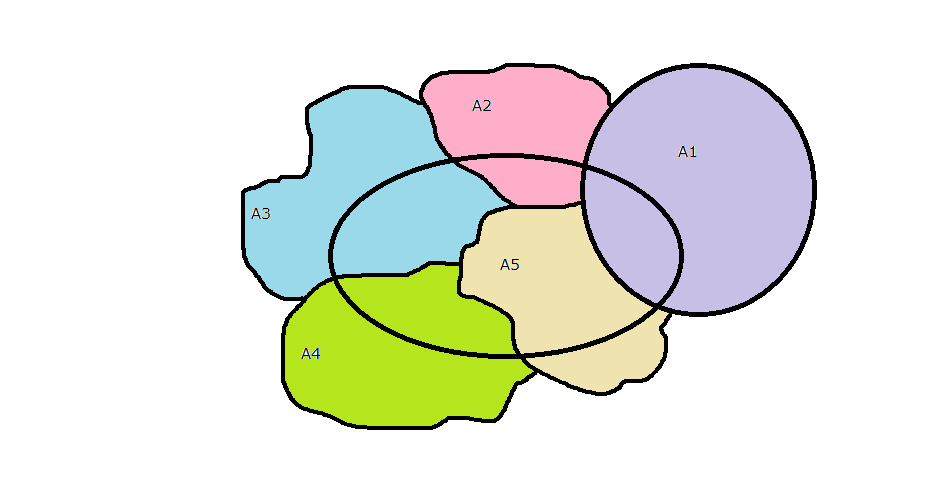

In [1]:
from IPython.display import Image
Image(filename='./assets/images/output_27_0.png') 

In the above picture, we see that each $A_1,..., A_5$ includes a piece of the center oval. In this example the oval represents $B$.

Basic probability defines the following relation: $$P(A|B) = \frac{ A \cap B }{B}$$ 

Intuitively, the relation indicates is that $P(A|B)$ is a ratio of the part of A that is common with B, *over the entirety of $B$*. 

Therefore, **the total probability can be thought of as the exhaustive sum of all probabilities on sets that share elements with B**. This equals simply the probability of B in our set of events.

So what is the purpose of the total probability with respect to the rest of Bayes formula? **In essence, it "normalizes" the numerator into a quantity between 0 and 1,** ensuring the left side of the formula is a probability.

---

### Solving probability using Bayes' theorem is easy when you know $P(B)$

Let's say we have two coins. Coin **FAIR** and coin **RIGGED**

    coin FAIR has a 50% chance of flipping heads.
    coin RIGGED has 99% chance of flipping heads.
    
Your friend chooses one of the two coins at random. He flips the coin and gets heads. 

What is the probability that the coin flipped was **FAIR**?

In [1]:
# P(fair | heads) = ( P(heads | fair) / P(heads) ) * P(fair)

# prior belief that the coin flipped was fair
p_fair = 0.5 # prior belief

# probability heads is flipped in general (total probability of heads)
# (50/100) + (99/100)
p_heads = (149./200.)

# probability that heads was flipped given the coin was fair
p_heads_given_fair = 0.5

p_fair_given_heads = (p_heads_given_fair / p_heads) * p_fair

print p_fair_given_heads

0.335570469799


---

## Bayes' theorem in the context of statistical modeling

We can also interpret the equations above in the context of statistical modeling, which we've been doing tons of in this class:

### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

Or in plain english:

**What is the probability of our model being true, given the data we have? This depends on the likelihood of the observed data given our model and the data iself, as well as our prior belief that this model is true.**

---


## Coin toss problem

Say we flip a coin 100 times get heads 58 times. 

What's the probability that the coin is not fair?

We can actually solve the probability of getting at least this many heads given a probability of 0.5 directly using the **binomial probability formula:**

### $$P(\;\text{at least k heads in n flips}\;) = \sum_{1}^k\binom{n}{k}p^kq^{n-k}$$

Where:

$n$ is the number of flips.

$k$ is the number of heads.

$p$ is the probability of heads.

$q$ is the probability of tails.

$\binom{n}{k}$ describes "n choose k" or the possible **combinations of k instances in n events**:

### $$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

---

**Calculate the probability of 71 heads in 100 flips with a probability of heads = 0.5.**

NOTE: Factorials can be calculated with `np.math.factorial()`


In [12]:
import numpy as np

# variables:
flips = 100
heads = 58
coin_p = 0.5

def calculate_k_prob(num_heads, f, p):
    denominator = np.math.factorial(num_heads) * np.math.factorial(f - num_heads)
    flips_choose_heads = np.math.factorial(f) / denominator

    chance = flips_choose_heads * p**num_heads * (1 - p)**(f - num_heads)
    return chance

probabilities = [calculate_k_prob(head, flips, coin_p) for head in range(1, heads + 1)]
all_probs = [calculate_k_prob(head, flips, coin_p) for head in range(1, 101)]

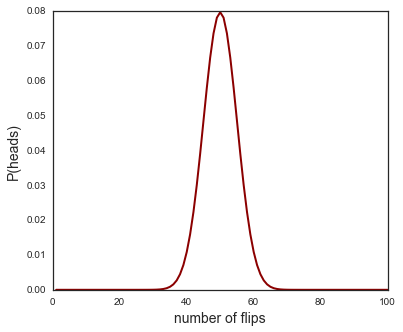

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

flips_range = range(1, 101)

plt.figure(figsize = (6, 5))
plt.plot(flips_range, all_probs, lw = 2, c = 'darkred')
plt.xlabel('number of flips', fontsize = 14)
plt.ylabel('P(heads)', fontsize = 14)
plt.show()

## Frequentist model testing

Again, say we flip a coin 100 times get heads 61 times. 

We want to test whether it is rigged with a Frequentist statistical model.

Recall that Frequentists construct a **null hypothesis** and an **alternative hypothesis**.

**NULL HYPOTHESIS H0:** The coin is fair. P(heads) = 0.5

**ALTERNATIVE HYPOTHESIS HA:** The coin is not fair. P(heads) != 0.5

---

### The Central Limit Theorem, z-score, and z-test

The theory behind what makes the calculations for Frequentist hypothesis testing conveniently easy is the Central Limit Theorem.

**CENTRAL LIMIT THEOREM:**

The mean of a sufficiently large number of iterations of independent random variables will be normally distributed, regardless of the underlying distribution of the random variable.

For example, if random samples of people from a population are taken and their mean height is calculated, the calculated mean heights of all of those random samples will all along a normal distribution of mean heights.

---

**THE Z-SCORE:**

A **z-score** is a normalized difference between a measured quantity and the quantity's expected value. It isdefined as:

### $$ z = \frac{\bar{x} - E[x]}{std(\bar{x})}$$

Where:

$\bar{x}$ is the empirical (observed) quantity/measurement.

$E[x]$ is the expected value of the quantity.

$std(\bar{x})$ is the empirical standard deviation of the quantity.

---

**THE Z-TEST**

The z-test is the standard Frequentist hypothesis test that gives us a **p-value** (significance) of our measurement. It's validity depends on the Central Limit Theorem.

A (two-tailed) p-value is calculated as:

### $$\text{p-value} = P[|z| > z_0] = 2P[z > z_0] = 2(1 - \Phi(z_0))$$

Where:

$z_0$ is our measured z-value.

$P[|z| > z_0]$ is the probability that the absolute value of z-value is larger than our measured z-value.

$2(1-\Phi(z_0))$ is 2 times 1 minus the cumulative distribution function (CDF) of the normal distribution at point $z_0$.

Because the CDF is valued between 0 and 1, essentially **the p-value is the proportion of z-values that are larger than our z-value.**

---

![](http://ipython-books.github.io/images/gaussian.png)

---

### Coding the z-test

We have:

    100 coin flips
    58 heads
    
Our hypotheses are:

    Null hypothesis H0: probability of heads is 0.5
    Alternative hypothesis HA: probability of heads is not 0.5
    
We want to find the probability that we got 71 heads given that our null hypothesis is true (the p-value).

Under the null hypothesis H0:

    E[x] = 0.5*flips
    Var(x) = (flips * P(heads) * (1 - P(heads))
    
NOTE: The variance is defined as such because coin flips are part of the [Bernoulli distribution](http://mathworld.wolfram.com/BernoulliDistribution.html).

**Calculate the p-value below:**

---

## Bayesian model testing

Now let's look at the same scenario but from the Bayesian perspective. 

### $$P\left(\;bias\;|\;observations\;\right) = \frac{P\left(\;observations\;|\;bias\;\right)}{P(\;data\;)} P\left(\;bias\;\right)$$

Where $P\left(\;bias\;\right)$ is the **probability distribution** of getting heads when the coin is flipped.

---

**A UNIFORM PRIOR**

You may think we'd assign $P\left(\;bias\;\right) = 0.5$, but that's not actually correct. This actually specifies a distribution of possible biases for our coin, with some biases potentially having a higher probability than others. 

Unlike when we were using Bayes formula before, we no longer know the true probability of heads, we just have a *distribution of beliefs* about what it might be.

If we have no idea, we can set our prior distribution $P\left(\;bias\;\right)$ to be a **uniform prior**. This indicates that we have no belief about the weighting of the coin whatsoever. We believe all potential biases and thus probabilities of flipping heads between 0 and 1 are equally likely.

With a uniform prior distribution, we set $P\left(\;bias\;\right) = 1$, which will give all possible biases exactly the same probability. (Imagine a "distribution" that is just a flat line.)

---

**THE LIKELIHOOD**

Luckily, we have already looked at the likelihood $P\left(\;observations\;|\;bias\;\right)$ earlier. It is the binomial probability function:

### $$P\left(\;observations\;|\;bias\;\right) = \binom{flips}{heads}bias^{heads}(1-bias)^{flips-heads}$$

This likelihood is the probability distribution of the observations given different biases.

---

**THE PROBABILITY OF THE DATA**

This is the most difficult part to understand (in my opinion)

$P\left(\;data\;\right)$ is not in just the proportion of heads in the observations. This too is a probability distribution rather than a discrete probability.

It turns out that $P\left(\;data\;\right)$ is **the probability of the data regardless of what the bias is.** We do this by integrating over all possible biases from 0 to 1:

### $$P\left(\;observations\;\right) = \int_{i=0}^1P\left(\;observations\;|\;bias\;\right)P\left(\;bias\;\right)\partial bias$$

Really this ends up just being a "normalizing factor" that makes sure the likelihood probability distribution integrates to 1. 

In other words this is **the chance of this many heads across all biases.**

---

**THE POSTERIOR PROBABILITY DISTRIBUTION**

Due to nice properties of the binomial distribution and our uniform prior, this gets conveniently solved to a tidy equation below (I am not going to go over how or why, [but you can look it up online](http://ipython-books.github.io/featured-07/)). 

Keep in mind that tidy solutions to posteriors are pretty rare, an issue we will discuss later. 

### $$P\left(\;bias\;|\;observations\;\right) = \frac{\binom{flips}{heads}bias^{heads}(1-bias)^{flips-heads}}{\int_{i=0}^1P\left(\;observations\;|\;bias\;\right)P\left(\;bias\;\right)\partial bias}$$

### $$P\left(\;bias\;|\;observations\;\right) = (flips + 1)\binom{flips}{heads}bias^{heads}(1-bias)^{flips-heads}$$

**Remember: this is a probability distribution of our bias given the data!**

---

**Code the posterior and plot it below**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

%matplotlib inline

In [3]:
# import scipy's combination function
from scipy.misc import comb


---

Good references and sources I modeled this off of:

http://ipython-books.github.io/featured-07/

http://stats.stackexchange.com/questions/31867/bayesian-vs-frequentist-interpretations-of-probability

http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

https://simple.wikipedia.org/wiki/Bayes%27_theorem

https://en.wikipedia.org/wiki/Central_limit_theorem

http://www.cogsci.ucsd.edu/classes/SP07/COGS14/NOTES/binomial_ztest.pdf

https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors

https://arbital.com/p/bayes_rule/?l=1zq

https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/

http://www.yudkowsky.net/rational/bayes/

http://people.stern.nyu.edu/wgreene/MathStat/Notes-2-BayesianStatistics.pdf

http://stats.stackexchange.com/questions/58564/help-me-understand-bayesian-prior-and-posterior-distributions

http://pages.uoregon.edu/cfulton/posts/bernoulli_trials_bayesian.html

http://chrisstrelioff.ws/sandbox/2014/12/11/inferring_probabilities_with_a_beta_prior_a_third_example_of_bayesian_calculations.html

https://www.chrisstucchio.com/blog/2013/magic_of_conjugate_priors.html

---